In [1]:
import pandas as pd
import spacy
from glob import glob
# import word2vec
# import gensim
# from gensim.test.utils import common_texts
# from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import json
from mpl_toolkits.mplot3d import Axes3D, proj3d
from numpy import dot
from numpy.linalg import norm
%matplotlib notebook
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
nlp = spacy.load('en_core_web_lg')

# Advanced Topics in Word Embeddings

## NYCDH Week, February 2019

Here are some more resources for getting started: 

- [A classic primer on Word Embeddings, from Google (uses TensorFlow)](https://www.tensorflow.org/tutorials/representation/word2vec)
- [Another word2vec tutorial using TensorFlow](https://adventuresinmachinelearning.com/word2vec-tutorial-tensorflow/)
- [The original documentation of word2vec](https://code.google.com/archive/p/word2vec/)
- [Spacy Docs on vector similarity](https://spacy.io/usage/vectors-similarity)
- [Gensim Docs](https://radimrehurek.com/gensim/models/keyedvectors.html)


For getting started in NLP more generally, here are two notebooks of mine: 

- [Introduction to Text Analysis](https://github.com/JonathanReeve/dataviz-workshop-2017)
- [Advanced Text Analysis Workshop](https://github.com/JonathanReeve/advanced-text-analysis-workshop-2017)

## An Example of Document Vectors: Project Gutenberg

![First 30 Books of Project Gutenberg](example-gut.png)

# Word Vector Similarity

In [60]:
africanSwallow = nlp('African swallow')
europeanSwallow = nlp('European swallow')
coconut = nlp('coconut')

In [61]:
africanSwallow.similarity(europeanSwallow)

0.8596378859289445

In [6]:
africanSwallow.similarity(coconut)

0.29012316320087245

In [7]:
def similarity(vecA, vecB):
    return dot(vecA, vecB) / (norm(vecA, ord=2) * norm(vecB, ord=2))

Gets most similar words

In [11]:
def mostSimilar(vec):
    highestSimilarities = [0]
    highestWords = [""]
    for w in nlp.vocab:
        sim = similarity(vec, w.vector)
        if sim > highestSimilarities[-1]:
            highestSimilarities.append(sim)
            highestWords.append(w.text.lower())
    return list(zip(highestWords, highestSimilarities))[-10:]

# Analogy Bot 

In [62]:
sql = nlp('sql')
mostSimilar(sql.vector)

[('', 0), ('truth', 0.06349843), ('want', 0.18007132)]

In [63]:
data = nlp('data')
mostSimilar(data.vector)

[('', 0),
 ('truth', 0.19171838),
 ('want', 0.25615644),
 ('property', 0.2976224),
 ('one', 0.31229097)]

In [65]:
data = nlp('science')
mostSimilar(data.vector)

[('', 0), ('truth', 0.44312733)]

In [12]:
mostSimilar(swallowArithmetic)

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in float_scalars
  


[('croup', 0.06349667),
 ('deceased', 0.11223719),
 ('jambalaya', 0.14376067),
 ('cobra', 0.17929555),
 ('addax', 0.18801448),
 ('tanzania', 0.25093195),
 ('rhinos', 0.3014531),
 ('lioness', 0.34080425),
 ('giraffe', 0.37119302),
 ('african', 0.5032688)]

In [13]:
mostSimilar(coconut.vector)

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in float_scalars
  


[('jambalaya', 0.24809696),
 ('tawny', 0.25790486),
 ('concentrate', 0.35225457),
 ('lasagna', 0.36302274),
 ('puddings', 0.4095627),
 ('peel', 0.47492552),
 ('eucalyptus', 0.48999348),
 ('carob', 0.5774758),
 ('peanut', 0.6609558),
 ('coconut', 1.0000001)]

In [14]:
king, queen, woman, man = [nlp(w).vector for w in ['king', 'queen', 'woman', 'man']]

In [15]:
answer = king - man + woman

In [16]:
mostSimilar(answer)

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in float_scalars
  


[('gorey', 0.034739517),
 ('deceased', 0.2673984),
 ('peasant', 0.3268029),
 ('guardian', 0.32859263),
 ('comforter', 0.346274),
 ('virgins', 0.35614407),
 ('kissing', 0.3649173),
 ('woman', 0.51508135),
 ('kingdom', 0.55209816),
 ('king', 0.8024261)]

In [17]:
paris, france, germany = [nlp(w).vector for w in ['Paris', 'France', 'Germany']]
answer = paris - france + germany
mostSimilar(answer)

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in float_scalars
  


[('orlando', 0.48517892),
 ('dresden', 0.5117479),
 ('warsaw', 0.56286174),
 ('stuttgart', 0.5869507),
 ('vienna', 0.60860515),
 ('prague', 0.62894964),
 ('munich', 0.66777843),
 ('paris', 0.6961338),
 ('berlin', 0.75474036),
 ('germany', 0.8027712)]

# Senses

In [28]:
senseDocs = [nlp(w) for w in ['sound', 'sight', 'touch', 'smell']]
def whichSense(word):
    doc = nlp(word)
    return {sense: doc.similarity(sense) for sense in senseDocs}


In [29]:
whichSense('symphony')

{sound: 0.37716483832358116,
 sight: 0.20594012171222334,
 touch: 0.19551651130481998,
 smell: 0.1985263912275575}

In [30]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,8)

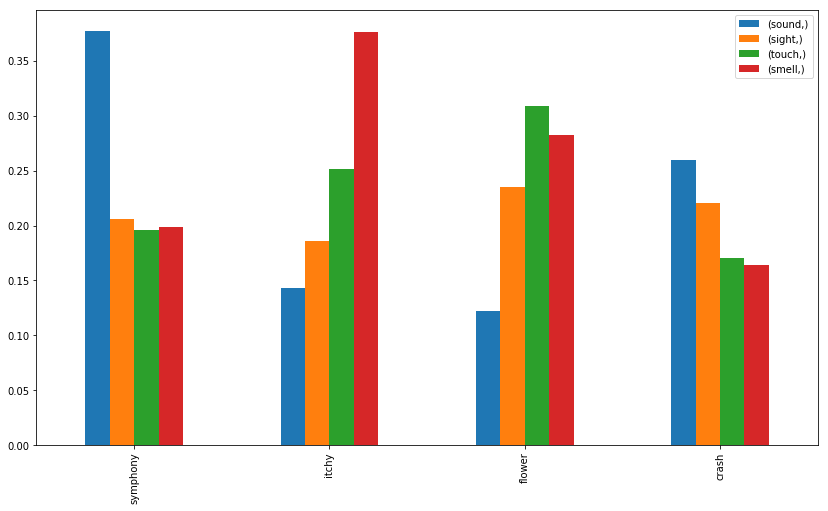

In [31]:
testWords = 'symphony itchy flower crash'.split()
pd.DataFrame([whichSense(w) for w in testWords], index=testWords).plot(kind='bar')